In [ ]:
`import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten


In [ ]:
X_train=np.loadtxt('/content/drive/MyDrive/Diksha/input.csv',delimiter=',')
Y_train=np.loadtxt('/content/drive/MyDrive/Diksha/labels.csv',delimiter=',')

X_test=np.loadtxt('/content/drive/MyDrive/Diksha/input_test.csv',delimiter=',')
Y_test=np.loadtxt('/content/drive/MyDrive/Diksha/labels_test.csv',delimiter=',')

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train:  ",Y_train.shape)
print("Shape of X_test:  ",X_test.shape)   #we have to reshape them accordingly in order to maintain stability
print("Shape of Y_test:   ",Y_test.shape)

Shape of X_train:  (2000, 30000)
Shape of Y_train:   (2000,)
Shape of X_test:   (400, 30000)
Shape of Y_test:    (400,)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_train=X_train.reshape(len(X_train),100,100,3) #here 100x100x3=30000
Y_train=Y_train.reshape(len(Y_train),1)
X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train:  ",Y_train.shape)
print("Shape of X_test:  ",X_test.shape)   #we have to reshape them accordingly in order to maintain stability
print("Shape of Y_test:   ",Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:   (2000, 1)
Shape of X_test:   (400, 100, 100, 3)
Shape of Y_test:    (400, 1)


In [ ]:
X_train[1,:]

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

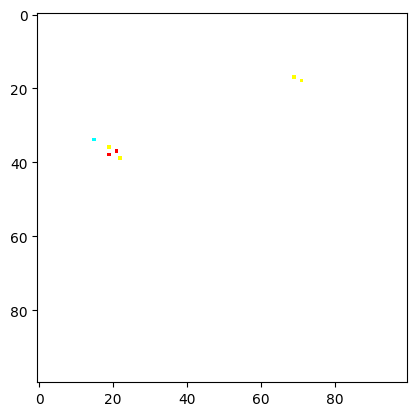

In [ ]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()


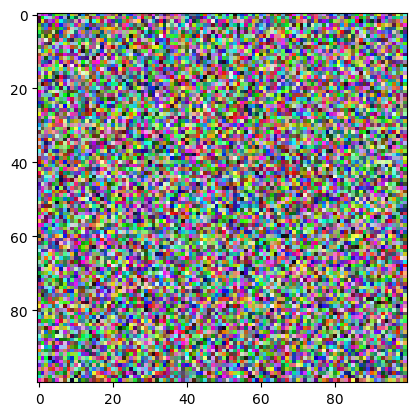

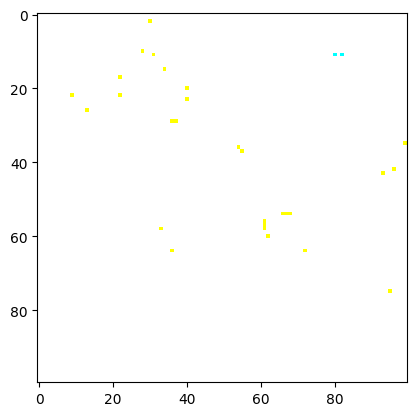

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming img_data is your image data
img_data = np.random.randint(0, 256, size=(100, 100, 3))  # Example random image data

# Normalize image data to [0, 1]
img_data_normalized = img_data / 255.0

# Display the normalized image
plt.imshow(img_data_normalized)
plt.show()
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),  # Added a comma here
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),  # Added a comma here
    Dense(1, activation='sigmoid')
])


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 23s 650ms/step - loss: 0.9814 - accuracy: 0.5020
Epoch 2/5
32/32 [==============================] - 22s 691ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 21s 644ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 23s 711ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 21s 650ms/step - loss: 0.6932 - accuracy: 0.5000


In [ ]:
model.evaluate(X_test,Y_test)


13/13 [==============================] - 1s 82ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931490898132324, 0.5]

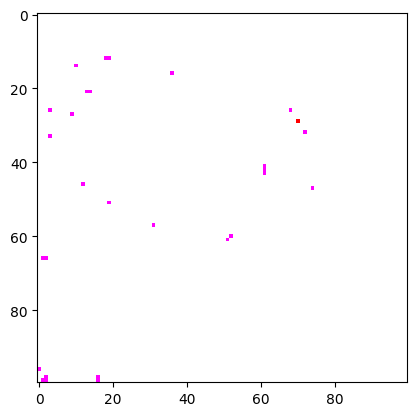

1/1 [==============================] - 0s 151ms/step
Our model says it is a -  dog


In [ ]:
#prediction
idx2=random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()
y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred=y_pred>0.5
if(y_pred==0):
   pred='dog'
else:
   pred='cat'
print("Our model says it is a - ",pred)